In [1]:
import numpy as np
import pandas as pd 
import warnings
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income values are missing

In [7]:
# Dropping the columns "Z_CostContact" and "Z_Revenue" because the value remains constant through the rows
data.drop(['Z_CostContact','Z_Revenue' ], axis=1, inplace=True)

In [8]:
data[data['Income'].isnull()].head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0


In [9]:
# There seems to be no pattern underlying the missingness of values.
# So, we shall drop the columns having missing values

In [10]:
data.dropna(inplace=True)

In [11]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [12]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [13]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [14]:
#Feature Engineering

#Extracting the Age of Customer
data["Age"] = 2021 - data['Year_Birth']

#Calculating the total amount spent
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Segmenting"Marital Status" into two groups
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children >0,1,0) 
#If data.Children > 0, then choose 1 else, choose 0 (that's why 3 parameters 0,1,0)

#Segmenting education levels into three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Renaming columns
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some redundant columns
data = data.drop(["Marital_Status", "Dt_Customer","Year_Birth", "ID"], axis=1)


In [15]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


<Figure size 576x396 with 0 Axes>

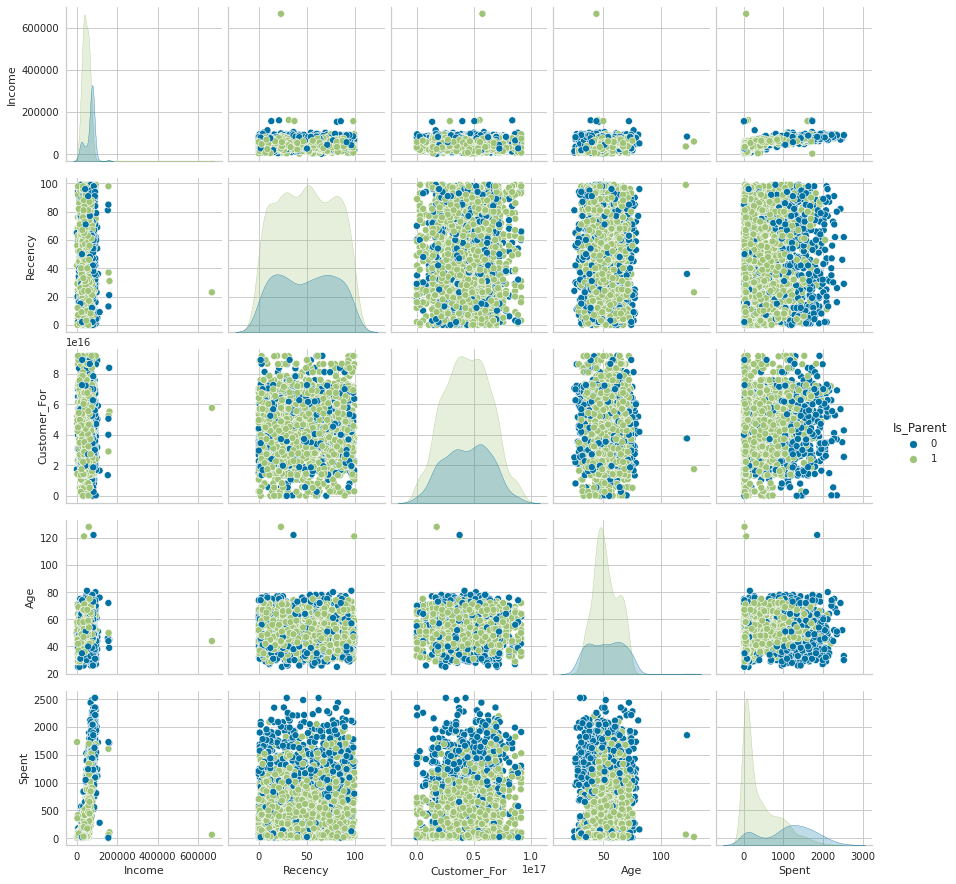

In [16]:
#To plot some selected features 

To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent") 
plt.show()

In [17]:
#There are some outliers in age, dropping those.
data = data[(data["Age"]<90)]
print(len(data))

2213


In [18]:
data.corr()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
Income,1.000000,-0.428231,0.019285,-0.003111,0.578481,0.430248,0.584361,0.438523,0.440532,0.325073,...,0.277071,0.087635,-0.024902,0.133302,-0.016445,0.163295,0.667516,-0.292873,-0.240050,-0.337585
Kidhome,-0.428231,1.000000,-0.039485,0.010196,-0.497407,-0.373305,-0.439192,-0.388777,-0.378014,-0.355095,...,-0.174339,-0.081946,0.037013,-0.078076,-0.057397,-0.237738,-0.558135,0.687945,0.583292,0.520478
Teenhome,0.019285,-0.039485,1.000000,0.014764,0.004312,-0.175736,-0.260778,-0.204954,-0.162794,-0.018315,...,-0.145058,-0.015580,0.007784,-0.154189,0.008702,0.362112,-0.137531,0.698033,0.594149,0.587560
Recency,-0.003111,0.010196,0.014764,1.000000,0.016332,-0.005129,0.023177,0.001007,0.025495,0.018394,...,-0.021036,-0.001382,0.005750,-0.199899,0.030467,0.015971,0.020839,0.018030,0.014531,0.001931
Wines,0.578481,-0.497407,0.004312,0.016332,1.000000,0.385892,0.568189,0.397035,0.389731,0.391604,...,0.351647,0.206319,-0.036376,0.246434,0.148438,0.164843,0.893034,-0.353322,-0.296815,-0.342155
Fruits,0.430248,-0.373305,-0.175736,-0.005129,0.385892,1.000000,0.546767,0.593062,0.571498,0.393503,...,0.192446,-0.009907,-0.002942,0.123059,0.059727,0.013542,0.612129,-0.395162,-0.341454,-0.410699
Meat,0.584361,-0.439192,-0.260778,0.023177,0.568189,0.546767,1.000000,0.573054,0.534713,0.357675,...,0.313422,0.043580,-0.020986,0.238059,0.071165,0.033823,0.845574,-0.504146,-0.430020,-0.574227
Fish,0.438523,-0.388777,-0.204954,0.001007,0.397035,0.593062,0.573054,1.000000,0.583548,0.426385,...,0.261755,0.002351,-0.019074,0.108227,0.077865,0.041316,0.641944,-0.427471,-0.363591,-0.449681
Sweets,0.440532,-0.378014,-0.162794,0.025495,0.389731,0.571498,0.534713,0.583548,1.000000,0.356868,...,0.245162,0.010175,-0.020540,0.116165,0.076139,0.021710,0.606744,-0.389136,-0.330788,-0.402172
Gold,0.325073,-0.355095,-0.018315,0.018394,0.391604,0.393503,0.357675,0.426385,0.356868,1.000000,...,0.170908,0.051004,-0.030137,0.141196,0.145417,0.059960,0.527211,-0.267772,-0.235921,-0.245513


In [19]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [20]:
#Label Encoding the object dtype
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)
    #using data[i] throws error because data[i] outputs a list while data[[i]] outputs a dataframe
    
    
    

In [21]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")


All features are now scaled


In [22]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893223,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,...,2.504247,-0.555456,0.692198,1.973525,1.018785,1.676723,-1.350076,-1.264914,-1.758879,-1.581639
1,-0.893223,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,...,-0.571168,-1.170837,-0.132699,-1.665655,1.275248,-0.962927,-1.350076,1.404857,0.448948,0.632255
2,-0.893223,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,...,-0.229456,1.290688,-0.545148,-0.172989,0.334882,0.280531,0.740699,-1.264914,-0.654965,-1.581639
3,-0.893223,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,...,-0.912881,-0.555456,0.279749,-1.923752,-1.289387,-0.919763,0.740699,0.069971,0.448948,0.632255
4,0.572087,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,...,0.112257,0.059925,-0.132699,-0.822535,-1.032923,-0.307165,0.740699,0.069971,0.448948,0.632255


In [23]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2213.0,-2.538513e-16,2.849275,-5.872119,-2.489667,-0.790094,2.412058,7.384399
col2,2213.0,-6.421534e-18,1.701742,-4.280498,-1.341466,-0.149821,1.222862,6.120580
col3,2213.0,2.922300e-17,1.217945,-4.710428,-0.828612,-0.016271,0.807247,6.575136


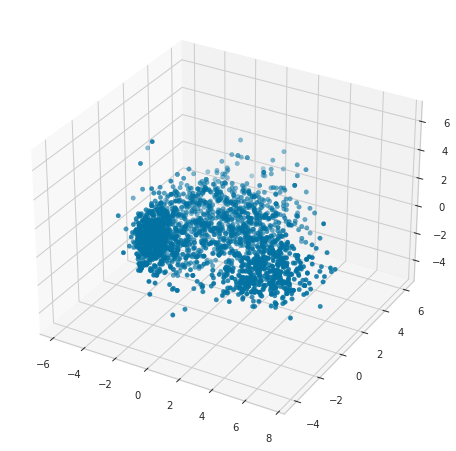

In [24]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z )
plt.show()


Clustrering

Determining number of clusters through Elbow Method


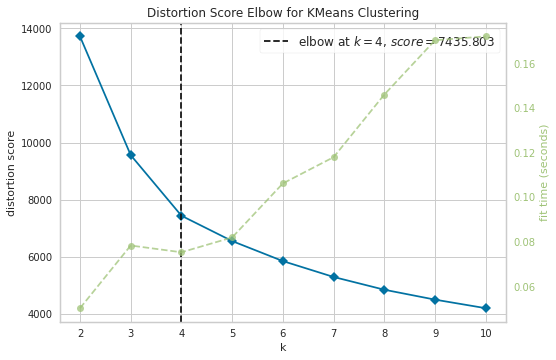

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
print('Determining number of clusters through Elbow Method')

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(PCA_ds)


From the above graph, it is apparent that the number of optimal clusters is 4.

In [27]:
# Hierarchical Clustering/ Agglomerative Clustering


AC = AgglomerativeClustering()
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC


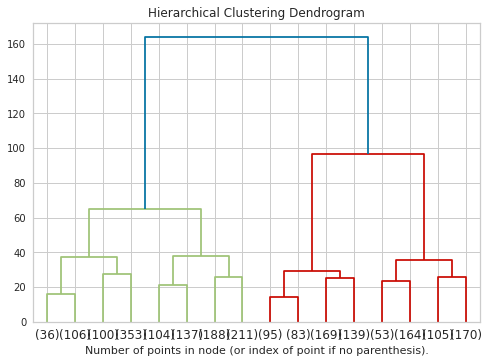

In [28]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = PCA_ds

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Visualizing Clusters

From the Dendrogram, it is evident that there are 4 optimal clusters, as determined from K Nearest Neighbours.

In [29]:
# Hierarchical Clustering/ Agglomerative Clustering


AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC

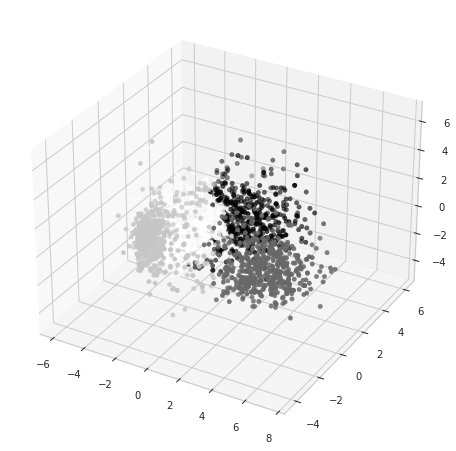

In [30]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z, c=PCA_ds["Clusters"])
plt.show()

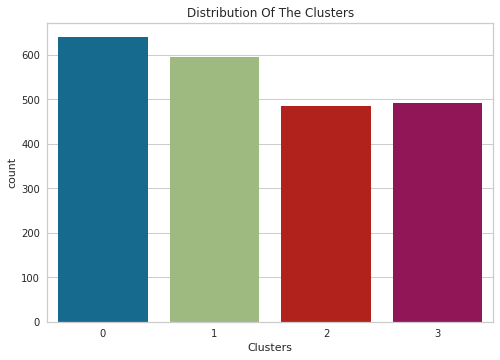

In [31]:
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

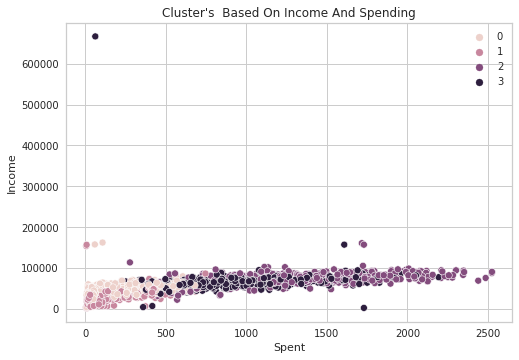

In [32]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Cluster's  Based On Income And Spending")
plt.legend()
plt.show()

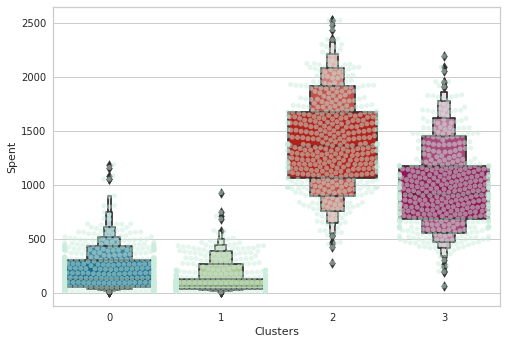

In [33]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"],color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"])
plt.show()


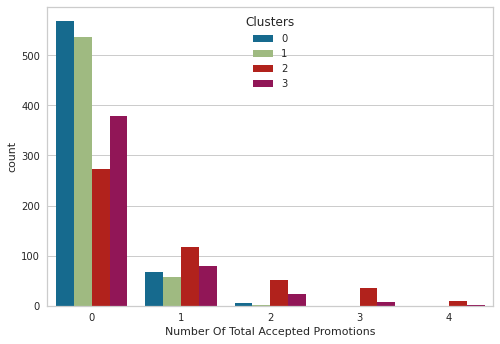

In [34]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"])
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

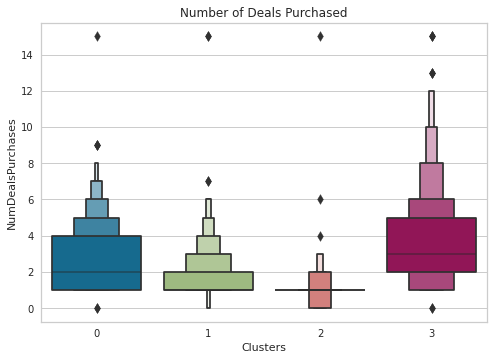

In [35]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

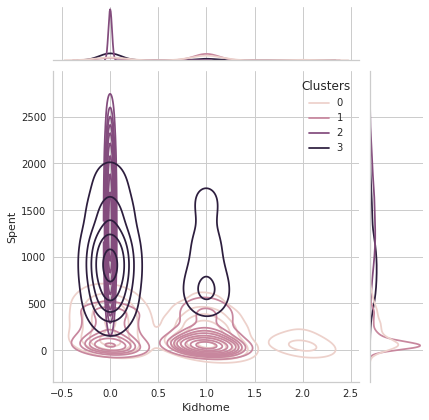

<Figure size 576x396 with 0 Axes>

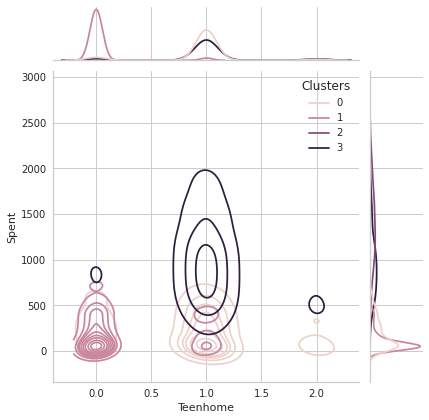

<Figure size 576x396 with 0 Axes>

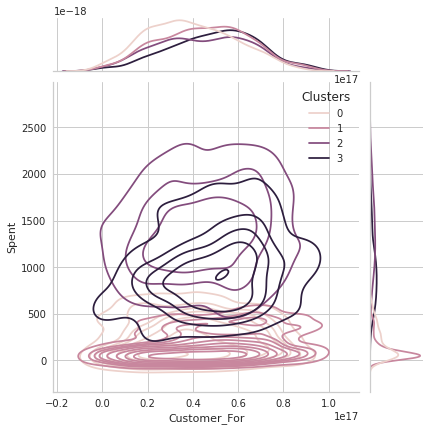

<Figure size 576x396 with 0 Axes>

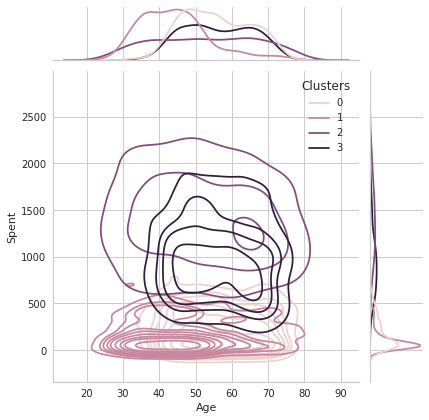

<Figure size 576x396 with 0 Axes>

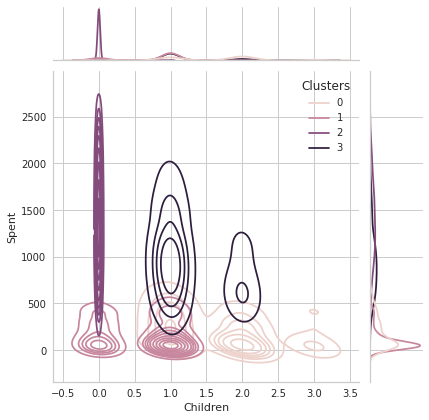

<Figure size 576x396 with 0 Axes>

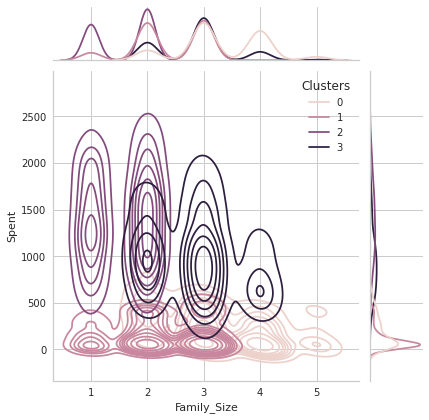

<Figure size 576x396 with 0 Axes>

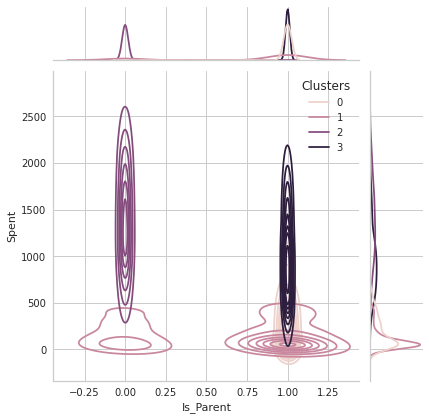

<Figure size 576x396 with 0 Axes>

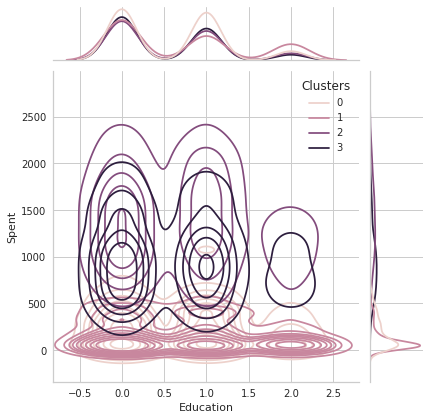

<Figure size 576x396 with 0 Axes>

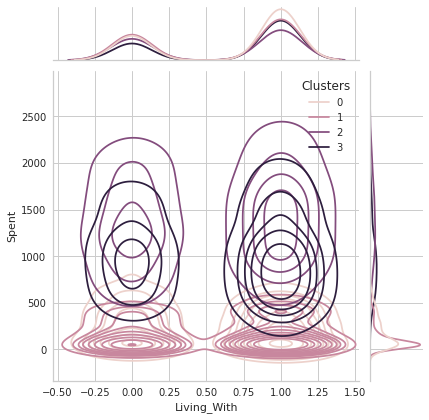

In [36]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde")
    plt.show()    